In [1]:
import cPickle as pickle
import gzip
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes


In [2]:
fins = [
    "../output_fromJSON/pitches_2016.pkl.gz",
    "../output_fromJSON/pitches_2017.pkl.gz",
    "../output_fromJSON/pitches_2018.pkl.gz",
    "../output_fromJSON/pitches_2019.pkl.gz",
]
dfs = []
for fin in fins:
    dfs.append(pd.read_pickle(fin, compression="gzip"))
df = pd.concat(dfs, ignore_index=True)

print "shape:", df.shape

shape: (2819683, 66)


In [3]:
hits = df.query("hit_launchSpeed>0 & hit_launchAngle>-90")[["hit_launchSpeed","hit_launchAngle","event"]]
print "hits shape:", hits.shape

hits shape: (444788, 3)


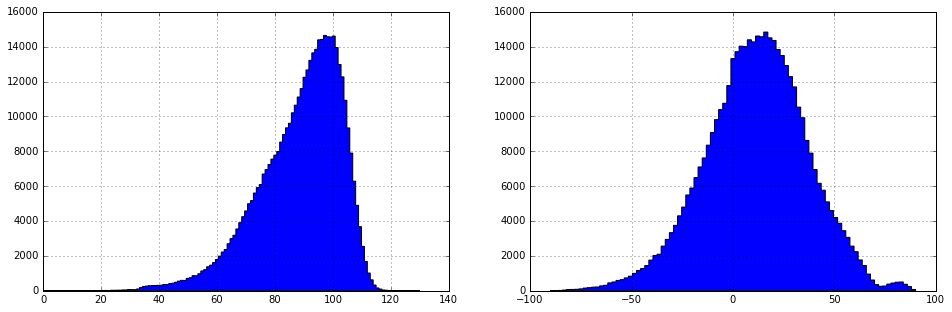

In [4]:
fix, axs = plt.subplots(1,2,figsize=(16,5))
hits.hit_launchSpeed.hist(bins=np.linspace(0,130,130), histtype='stepfilled', ax=axs[0])
hits.hit_launchAngle.hist(bins=np.linspace(-90,90,90), histtype='stepfilled', ax=axs[1])

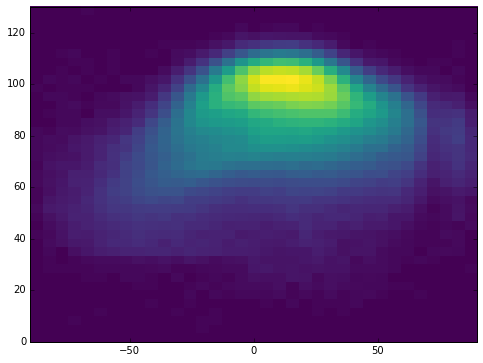

In [5]:
import matplotlib.colors as mcolors
plt.figure(figsize=(8,6))
binsx = np.linspace(-90,90,36)
binsy = np.linspace(0,130,40)
plt.hist2d(hits.hit_launchAngle,hits.hit_launchSpeed, bins=[binsx,binsy], cmap='viridis', norm=mcolors.PowerNorm(0.5));

/cvmfs/cms.cern.ch/slc7_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


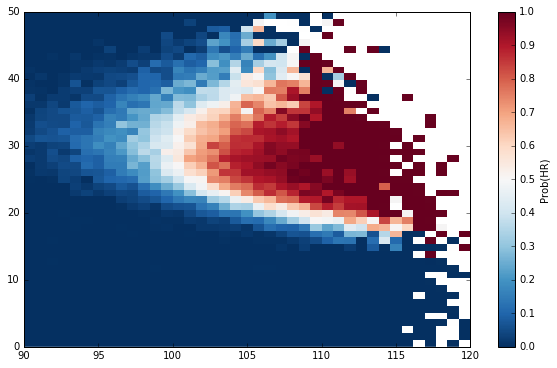

In [56]:
hrs = hits[hits.event=="Home Run"]
binsx = np.linspace(90,120,40)
binsy = np.linspace(0,50,50)
hist_all,_,_ = np.histogram2d(hits.hit_launchSpeed, hits.hit_launchAngle, bins=[binsx,binsy])
hist_hrs,_,_ = np.histogram2d(hrs.hit_launchSpeed, hrs.hit_launchAngle, bins=[binsx,binsy])
hr_prob = hist_hrs / hist_all
plt.figure(figsize=(10,6))
im = plt.imshow(hr_prob.T, interpolation='none', cmap='RdBu_r', extent=(binsx[0],binsx[-1],binsy[0],binsy[-1]), origin='low', aspect='auto')
cb = plt.colorbar(im)
plt.xlabel("Exit velocity (mph)")
plt.ylabel("Launch angle (deg)")
cb.set_label("Prob(HR)")

In [7]:
ishit = lambda x:x in ["Single","Double","Triple","Home Run"]
nbases = lambda x:{"Single":1,"Double":2,"Triple":3,"Home Run":4}.get(x,0)
woba = lambda x:{"Single":0.88,"Double":1.247,"Triple":1.578,"Home Run":2.031}.get(x,0)
hits["ishit"] = hits.event.apply(ishit)
hits["nbases"] = hits.event.apply(nbases)
hits["woba"] = hits.event.apply(woba)
hits[["event","ishit","nbases","woba"]].head(15)

,event,ishit,nbases,woba
5,Lineout,False,0,0.00
10,Groundout,False,0,0.00
13,Groundout,False,0,0.00
18,Field Error,False,0,0.00
30,Grounded Into DP,False,0,0.00
54,Groundout,False,0,0.00
62,Flyout,False,0,0.00
79,Single,True,1,0.88
84,Groundout,False,0,0.00
88,Lineout,False,0,0.00


/cvmfs/cms.cern.ch/slc7_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


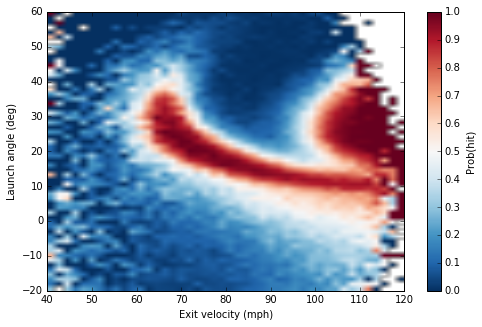

In [58]:
truehits = hits[hits.ishit]
binsx = np.linspace(40,120,45)
binsy = np.linspace(-20,60,60)
hist_all,_,_ = np.histogram2d(hits.hit_launchSpeed, hits.hit_launchAngle, bins=[binsx,binsy])
hist_truehits,_,_ = np.histogram2d(truehits.hit_launchSpeed, truehits.hit_launchAngle, bins=[binsx,binsy])
hit_prob = hist_truehits / hist_all
plt.figure(figsize=(8,5))
im = plt.imshow(hit_prob.T, interpolation='bilinear', cmap='RdBu_r', extent=(binsx[0],binsx[-1],binsy[0],binsy[-1]), origin='low', aspect='auto')
cb = plt.colorbar(im)
plt.xlabel("Exit velocity (mph)")
plt.ylabel("Launch angle (deg)")
cb.set_label("Prob(hit)")

/cvmfs/cms.cern.ch/slc7_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  
/cvmfs/cms.cern.ch/slc7_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


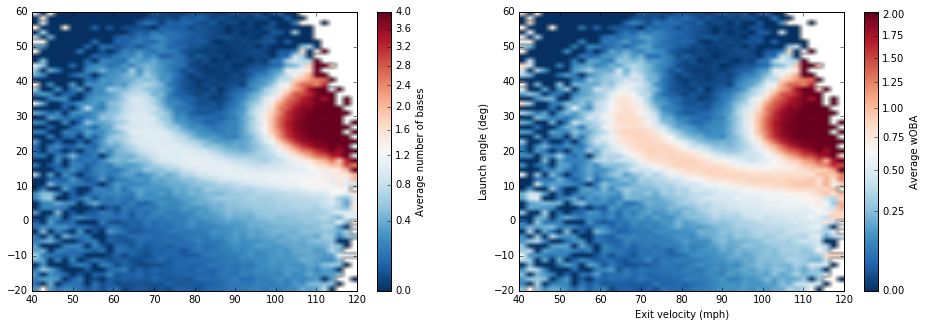

In [57]:
binsx = np.linspace(40,120,45)
binsy = np.linspace(-20,60,60)
hist_all,_,_ = np.histogram2d(hits.hit_launchSpeed, hits.hit_launchAngle, bins=[binsx,binsy])
hist_nbases,_,_ = np.histogram2d(hits.hit_launchSpeed, hits.hit_launchAngle, bins=[binsx,binsy], weights=hits.nbases)
hist_woba,_,_ = np.histogram2d(hits.hit_launchSpeed, hits.hit_launchAngle, bins=[binsx,binsy], weights=hits.woba)
hit_avg_nbases = hist_nbases / hist_all
hit_avg_woba = hist_woba / hist_all
fix,axs = plt.subplots(1, 2, figsize=(16,5))
im = axs[0].imshow(hit_avg_nbases.T, interpolation='bilinear', cmap='RdBu_r', extent=(binsx[0],binsx[-1],binsy[0],binsy[-1]), origin='low', aspect='auto',norm=mcolors.PowerNorm(0.6))
cb = plt.colorbar(im, ax=axs[0])
plt.xlabel("Exit velocity (mph)")
plt.ylabel("Launch angle (deg)")
cb.set_label("Average number of bases")
im = axs[1].imshow(hit_avg_woba.T, interpolation='bilinear', cmap='RdBu_r', extent=(binsx[0],binsx[-1],binsy[0],binsy[-1]), origin='low', aspect='auto',norm=mcolors.PowerNorm(0.6))
cb = plt.colorbar(im, ax=axs[1])
plt.xlabel("Exit velocity (mph)")
plt.ylabel("Launch angle (deg)")
cb.set_label("Average wOBA")